## 5. Brown運動のシミュレーション

### 5.1 Langevin方程式

溶媒内にある質量$m$の粒子（灰色）は，周囲の溶媒分子（赤色）の衝突に起因する熱揺動力$\mathbf{F}(t)$と，粒子の速度に比例した流体抵抗力$-\zeta\mathbf{V}(t)$とを受けながら不規則に運動する．これがブラウン運動である．

<img src="./Brownian.jpg" width="400">

- $\mathbf{R}(t)$: 粒子の位置座標
- $\mathbf{V}(t)$: 粒子の速度
- $\mathbf{F}(t)$: 溶媒分子による熱揺動力
- $t$: 時間
- $m$: 粒子の質量
- $\zeta$: 粒子の流体抵抗係数

膨大な数に上る全ての溶媒分子の運動を正確に知ることは非現実的なので，搖動力を確率的な力として定式化する．つまり粒子の運動方程式を，確率微分方程式である以下のLangevin方程式で表すことにする．

\begin{equation}
m\frac{d\mathbf{V}(t)}{dt}=-\zeta\mathbf{V}(t)+\mathbf{F}(t) 
\tag{1}
\end{equation}

ここで確率的な揺動力$\mathbf{F}(t)$は形が決まった関数として書けないので，ランダムなホワイトノイズ（時間相関がない→コンピュータの擬似乱数がそのまま使える）として取り扱う．第２回目の講義で説明したように，以下のようにxyz各成分ともに平均がゼロ，分散が$2k_B T\zeta /m$であることが揺動散逸定理により要請される（異なる成分の相関はない）．

\begin{equation}
\langle \mathbf{F}(t)\rangle=\mathbf{0} 
\tag{2}
\end{equation}

\begin{equation}
\langle \mathbf{F}(t)\mathbf{F}(0)\rangle = {2k_B T\zeta}\mathbf{I}\delta(t)  
\tag{3}
\end{equation}

### 5.2. ランダム力の積分

時刻$t$を小さな間隔$\Delta t$で区切り，$t_i\equiv i\Delta t \ (i=0,1,2,...)$と離散化して考える．

\begin{equation}
\mathbf{V}_{i+1}=\mathbf{V}_i-\frac{\zeta}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)+\frac{1}{m}\int_{t_i}^{t_{i+1}} dt\mathbf{F}(t)\simeq\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} \Delta \mathbf{W}_i 
\tag{4}
\end{equation}

ここで右辺第１項は被積分関数が滑らかなのでオイラー法を適用できる．しかし激しく振動する第２項には適用できないので，揺動力を$\Delta t$の区間で積分した新たな確率変数$\Delta \mathbf{W}_i$を導入する．
計算の詳細は省略するが，確率変数$\Delta \mathbf{W}_i$のxyz各成分はやはりホワイトノイズであり，ともに平均がゼロ，分散が$2k_B T\zeta \Delta t$の正規分布に従う．


粒子位置$\mathbf{R}(t)$については，通常のオイラー法を適用する．

\begin{equation}
\mathbf{R}_{i+1}=\mathbf{R}_i+\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)\simeq\mathbf{R}_i+\mathbf{V}_i \Delta t 
\tag{5}
\end{equation}



### 5.3. Brown運動する自由粒子のシミュレーション＆動画表示

- 初期時刻$t=0$に原点にあるnump個の粒子のBrown運動を同時にシミュレーションし，赤球で表示する．
- n=0の粒子のみ青線で軌跡を表示する．

In [9]:
% matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.animation as animation

In [14]:
dim  = 3
nump = 1
nums = 1024
box  = 30
dt   = 0.05
zeta = 1.0
m    = 1.0
kBT  = 1.0
std  = np.sqrt(2*kBT*zeta*dt)
np.random.seed(0)
R = np.zeros([dim,nump])
V = np.zeros([dim,nump])
F = np.zeros([dim,nump])
Rs= np.zeros([dim,nump,nums])
Vs= np.zeros([dim,nump,nums])
Fs= np.zeros([dim,nump,nums])
time = np.zeros([nums])
omega= np.zeros([nums])

<IPython.core.display.Javascript object>


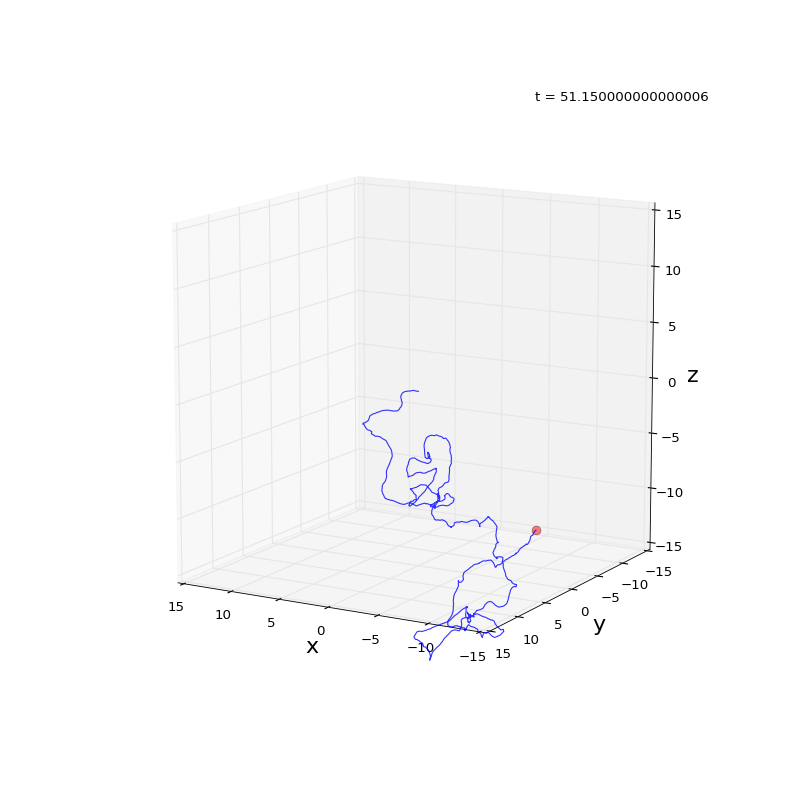

In [15]:
# 3D Brownian particle simulation with 3D animation
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim(-box/2,box/2)
ax.set_ylim(-box/2,box/2)
ax.set_zlim(-box/2,box/2)
ax.set_xlabel(r"x", fontsize=20)
ax.set_ylabel(r"y", fontsize=20)
ax.set_zlabel(r"z", fontsize=20)
ax.view_init(elev = 12, azim = 120)

particles, = ax.plot([], [], [], 'ro',ms=8, alpha=0.5)
title = ax.text(-150., 0.,200.,r'', transform = ax.transAxes, va='center')
line, = ax.plot([], [], [], lw=1, alpha=0.8)
xdata, ydata, zdata = [], [], []
n = 0

def init():
    title.set_text(r'')
    xdata.append(R[0,n])
    ydata.append(R[1,n])
    zdata.append(R[2,n])
    line.set_data(xdata,ydata)
    line.set_3d_properties(zdata)
    particles.set_data(R[0:2, :nump])
    particles.set_3d_properties(R[2, :nump])
    return particles,title,line

def animate(i):
    global R,V,F,Rs,Vs,Fs,time
    F = std*np.random.randn(dim,nump)
    V = V*(1-zeta/m*dt)+F/m
    R = R + V*dt
    title.set_text(r"t = "+str(i*dt))
    xdata.append(R[0,n])
    ydata.append(R[1,n])
    zdata.append(R[2,n])
    line.set_data(xdata,ydata)
    line.set_3d_properties(zdata)
    particles.set_data(R[0:2, :nump])
    particles.set_3d_properties(R[2, :nump])
    Rs[0:dim,0:nump,i]=R
    Vs[0:dim,0:nump,i]=V
    Fs[0:dim,0:nump,i]=F
    time[i]=i*dt
    return particles,title,line

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nums, interval=2, blit=True, repeat=False)
#anim.save('hoge.mp4')
anim.save('hoge.mp4',fps=30, dpi=600)
#aanim.save(anim,'toll.mp4', fps=20, dpi=800, codec='mp4')
plt.show()

### 5.4. 保存された種々のデータ(A(t), B(t), ...)を時刻(t)の関数としてプロット

- 動画で軌跡が青線で示されているn=0の粒子について，位置$R_x(t),R_y(t),R_z(t) $を横軸，時刻$t$を縦軸にとってプロットする．

<IPython.core.display.Javascript object>


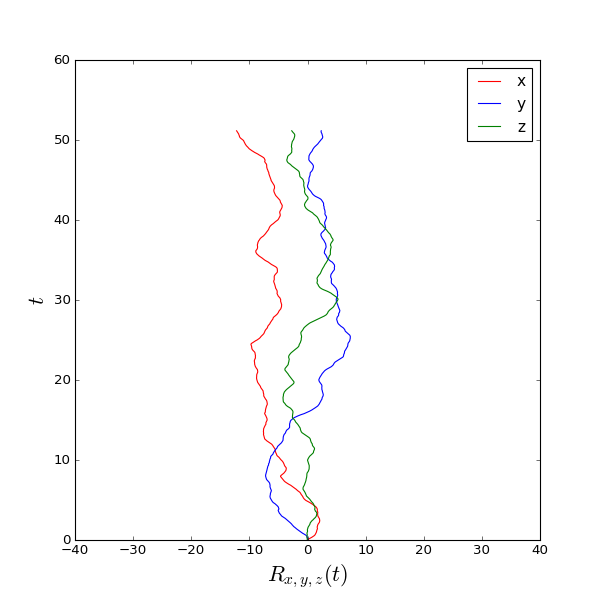

In [4]:
# particle positions vs time
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$R_{x,y,z}(t)$", fontsize=20)
ax.set_ylabel(r"$t$", fontsize=20)
n = 0
ax.plot(Rs[0,n,0:nums],time,'r')
ax.plot(Rs[1,n,0:nums],time,'b')
ax.plot(Rs[2,n,0:nums],time,'g')
plt.xlim(-40, 40)
ax.legend([r'x',r'y',r'z'], fontsize=14)
plt.show()

### 宿題 #5

- 1番目(n=0)の粒子の速度$V_x(t),V_y(t),V_z(t)$を時刻$t$の関数として表示せよ．グラフが見やすいように表示範囲を調整してみよう．

*************************
今回はここまで
*************************

## 6. Brown運動の解析

「5. Brown運動のシミュレーション」のつづき．直前のセルまで予め実行してください．そこで作成されたデータを今回の解析で使用します．

### 6.1. 粒子位置の分布関数

- nump個の粒子の位置$R_x(t),R_y(t),R_z(t)$を同時にプロットし，時刻$t$の経過による粒子位置の分布の変化をみる．

<IPython.core.display.Javascript object>


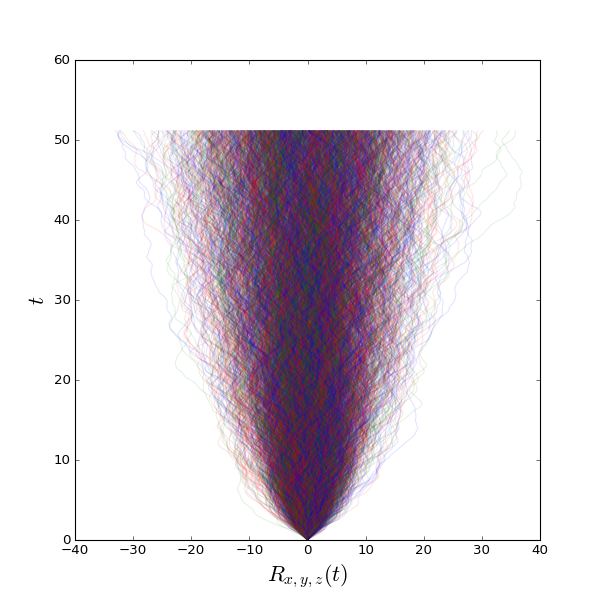

In [17]:
# particle positions vs time
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$R_{x,y,z}(t)$", fontsize=20)
ax.set_ylabel(r"$t$", fontsize=20)
for n in range(nump):
    ax.plot(Rs[0,n,0:nums],time,'r', alpha=0.1)
    ax.plot(Rs[1,n,0:nums],time,'b', alpha=0.1)
    ax.plot(Rs[2,n,0:nums],time,'g', alpha=0.1)
plt.xlim(-40, 40)
plt.show()

- シミュレーション終了時$t=t_{\rm end}$における粒子位置の分布関数$P(R_x),P(R_y),P(R_z)$を，平均$\langle P\rangle=0$，分散$\sigma^2=\frac{2k_BTt_{\rm end}}{\zeta}$の正規分布$P(R)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(P-\langle P\rangle)^2}{2\sigma^2}\right]$と比較する．

<IPython.core.display.Javascript object>


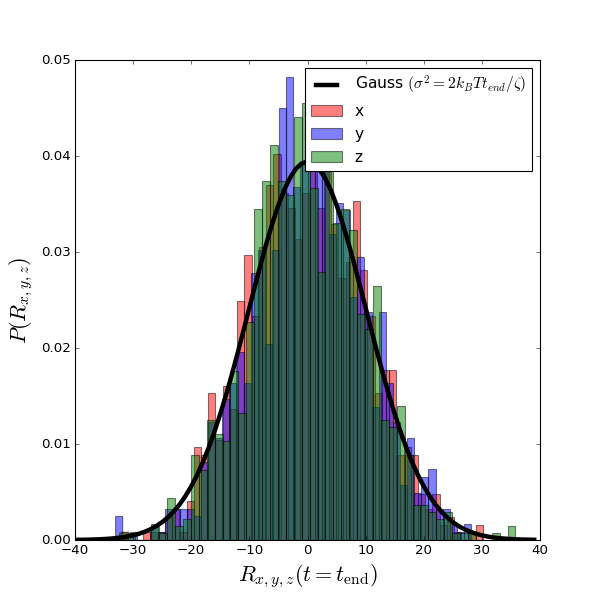

In [18]:
# positional distribution of particles at the end of the simulation
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$R_{x,y,z}(t=t_\mathrm{end})$", fontsize=20)
ax.set_ylabel(r"$P(R_{x,y,z})$", fontsize=20)
plt.hist(Rs[0,0:nump,nums-1], bins=50,normed=True,facecolor='r',alpha=0.5)
plt.hist(Rs[1,0:nump,nums-1], bins=50,normed=True,facecolor='b',alpha=0.5)
plt.hist(Rs[2,0:nump,nums-1], bins=50,normed=True,facecolor='g',alpha=0.5)
sig2=2*kBT/zeta*dt*nums
ave=0.0
x = np.arange(-40,40,1)
y = np.exp(-(x-ave)**2/2/sig2)/np.sqrt(2*np.pi*sig2)
plt.plot(x,y,lw=4,color='k')
ax.legend([r'Gauss $(\sigma^2=2k_BT t_{end}/\zeta)$',r'x',r'y',r'z'], fontsize=14)
plt.xlim(-40,40)
plt.show()

### 6.2. 粒子速度の分布関数 (Maxwell-Boltzmann分布)

- nump個の粒子の速度$V_x(t),V_y(t),V_z(t)$を時刻$t$の関数として同時にプロットし，粒子速度の分布の時間変化をみる．


<IPython.core.display.Javascript object>


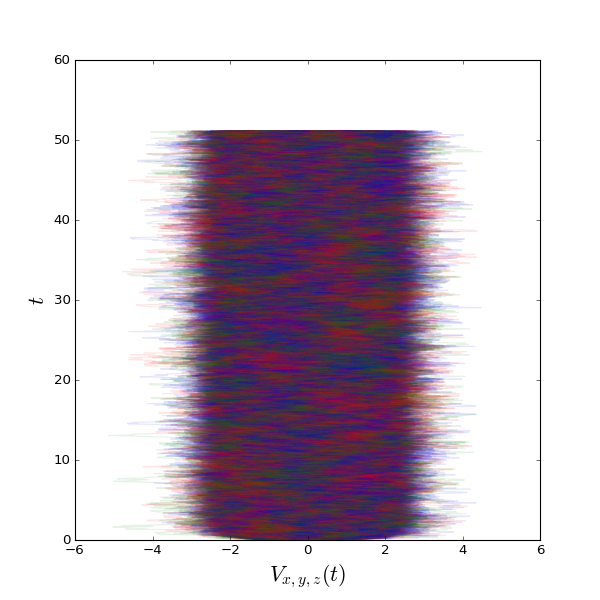

In [19]:
# particle velocities vs time
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$V_{x,y,z}(t)$", fontsize=20)
ax.set_ylabel(r"$t$", fontsize=20)
for n in range(nump):
    ax.plot(Vs[0,n,0:nums],time,'r', alpha=0.1)
    ax.plot(Vs[1,n,0:nums],time,'b', alpha=0.1)
    ax.plot(Vs[2,n,0:nums],time,'g', alpha=0.1)
plt.xlim(-6, 6)
plt.show()

- シミュレーション終了時$t=t_{\rm end}$における粒子速度の分布関数$P(V_x),P(V_y),P(V_z)$を，平均$\langle V\rangle=0$，分散$\sigma^2=\frac{2k_BT}{m}$の正規分布$P(V)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(V-\langle V\rangle)^2}{2\sigma^2}\right]$と比較する（Maxwell-Boltzmann分布）．

<IPython.core.display.Javascript object>


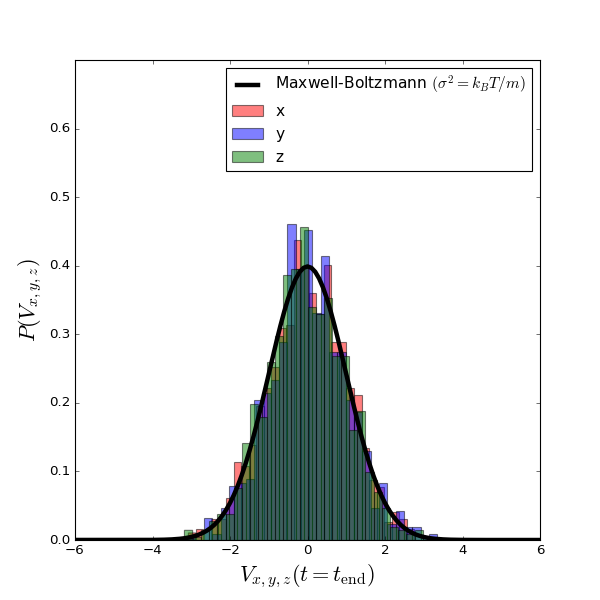

In [20]:
# velocity distribution of particles at the end of the simulation
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$V_{x,y,z}(t=t_\mathrm{end})$", fontsize=20)
ax.set_ylabel(r"$P(V_{x,y,z})$", fontsize=20)
plt.hist(Vs[0,0:nump,nums-1], bins=30,normed=True,facecolor='r',alpha=0.5)
plt.hist(Vs[1,0:nump,nums-1], bins=30,normed=True,facecolor='b',alpha=0.5)
plt.hist(Vs[2,0:nump,nums-1], bins=30,normed=True,facecolor='g',alpha=0.5)
sig2=kBT/m
ave=0.0
x = np.arange(-10,10,0.1)
y = np.exp(-(x-ave)**2/2/sig2)/np.sqrt(2*np.pi*sig2)
plt.plot(x,y,lw=4,color='k')
ax.legend([r'Maxwell-Boltzmann $(\sigma^2=k_BT/m)$',r'x',r'y',r'z'], fontsize=14)
plt.xlim(-6, 6)
plt.ylim(0, 0.7)
plt.show()

### 6.3. 粒子の平均二乗変位と拡散係数

- 粒子の平均二乗変位$\langle[\mathbf{R}(t)-\mathbf{R}(0)]^2\rangle$を時間$t$の関数としてプロットし，Einsteinの式$D=\frac{k_BT}{\zeta}$を用いた理論値$6Dt$と比較する．

<IPython.core.display.Javascript object>


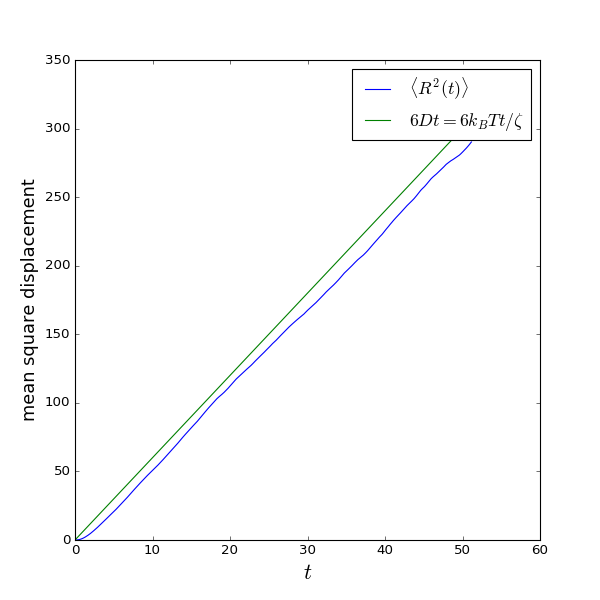

In [21]:
# mean square displacement vs time
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"mean square displacement", fontsize=16)
msd = np.zeros([nums])
for i in range(nums):
    for n in range(nump):
        for d in range(dim):
            msd[i]=msd[i]+Rs[d,n,i]**2
    msd[i] = msd[i]/nump
ax.plot(time,msd)
ax.plot(time,6*kBT/zeta*time)
ax.legend([r'$\langle R^2(t)\rangle$',r'$6Dt={6k_BT t}/{\zeta}$'], fontsize=16)
plt.show()

### 6.4. 自己相関関数

- 粒子速度の自己相関関数$C_V(t)=\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$を求め，理論値$C_V(t)=\frac{3k_BT}{m}\exp\left[-\frac{\zeta}{m}t\right]$と比較する．
- 揺動力による力積の自己相関関数$C_W(t)=\langle\Delta\mathbf{W}(t)\cdot \Delta\mathbf{W}(0)\rangle$を求め，ホワイトノイズであることを確認する．



<IPython.core.display.Javascript object>


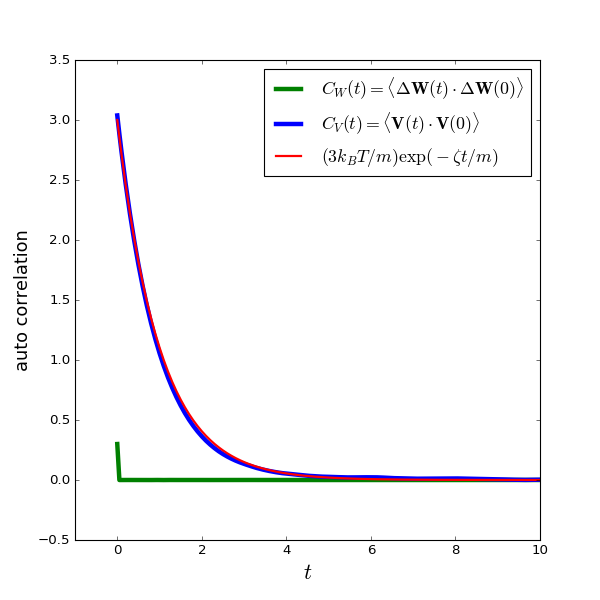

In [10]:
# auto correlation functions for dW(green) and V(blue)
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"auto correlation", fontsize=16)
def auto_correlate(dt):
    cor = np.correlate(dt,dt,mode="full")
#    return cor[cor.size/2:]      # This is original but creates a warning
    return cor[nums-1:]          # cor[0:2*nums-1] is an even function centered at nums-1
X     = np.zeros([nums])
corrv = np.zeros([nums])
corrf = np.zeros([nums])
for n in range(nump):
    for d in range(dim):
        X = Fs[d,n,0:nums]
        corrf=corrf+auto_correlate(X)/nums
        X = Vs[d,n,0:nums]
        corrv=corrv+auto_correlate(X)/nums
corrf=corrf/nump                 # corrf(0)*dt/m=2*dim*kBT*zeta/m
corrv=corrv/nump                 # corrv(0)=dim*kBT/m
plt.xlim(-1, 10)
#plt.ylim(-1, 8)
ax.plot(time,corrf,'g',lw=4)
ax.plot(time,corrv,'b',lw=4)
ax.plot(time,dim*kBT/m*np.exp(-zeta/m*time),'r',lw=2)
ax.legend([r'$C_W(t)=\langle\Delta\mathbf{W}(t)\cdot \Delta\mathbf{W}(0)\rangle$'
           ,r'$C_V(t)=\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$'
           ,r'$(3k_BT/m)\exp(-\zeta t/m)$'], fontsize=16)
plt.show()

### 6.5. スペクトル密度

- 粒子速度のスペクトル密度$S_V(\omega)=\langle |\mathbf{V}(\omega)|^2\rangle$を求め，理論値$S_V(\omega)=\frac{6k_BT}{m^2\omega^2+\zeta^2}$と比較する．



<IPython.core.display.Javascript object>


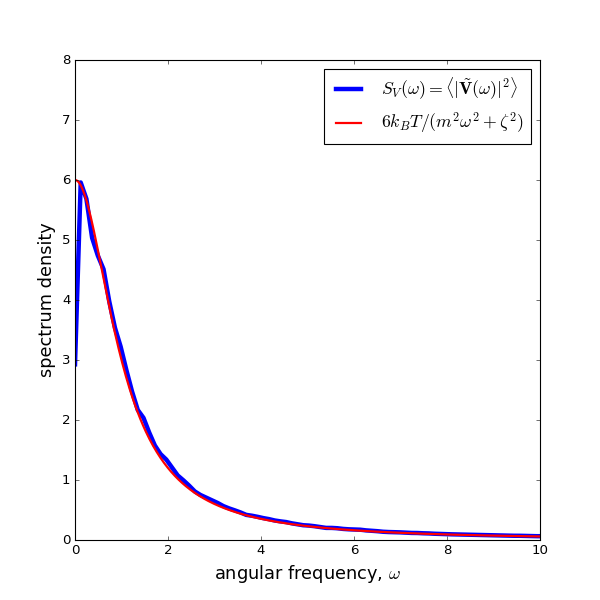

In [11]:
# power spectrum for V
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"angular frequency, $\omega$", fontsize=16)
ax.set_ylabel(r"spectrum density", fontsize=16)
X = np.zeros([nums])
Y = np.zeros([nums])
Z = np.zeros([nums])
omega=np.zeros(nums)
for n in range(nump):
    for d in range(dim):
        X = Vs[d,n,0:nums]
        Y,omega=mlab.psd(X,NFFT=1024, Fs=1/dt,noverlap=1024/4)
        Z[:len(Y)] = Z[:len(Y)] + Y
Z = Z/nump
ax.plot(omega*2*np.pi,Z[0:len(Y)]/2,'b',lw=4)           # 0 < omega [Hz] < \infty, Z[0]/2=2*dim*kBT/zeta**2
plt.xlim(0, 10)
plt.ylim(0, 8)
ax.plot(omega,6*kBT/(m**2*omega**2+zeta**2),'r',lw=2)  # -\infty < omega [2\pi*Hz] < \infty
ax.legend([r'$S_V(\omega)=\langle|\~\mathbf{V}(\omega)|^2\rangle$'
           ,r'$6k_BT/(m^2\omega^2+\zeta^2)$'], fontsize=16)
plt.show()

- 揺動力による力積スペクトル密度$S_W(\omega)=\langle |\mathbf{\Delta W}(\omega)|^2\rangle$を求め，理論値$S_W(\omega)=6k_BT\zeta\Delta t$と比較する．


<IPython.core.display.Javascript object>


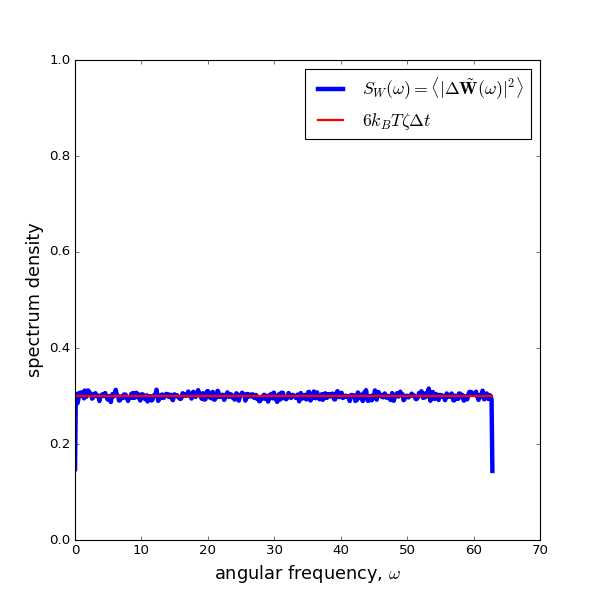

In [12]:
# power spectrum for dW
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"angular frequency, $\omega$", fontsize=16)
ax.set_ylabel(r"spectrum density", fontsize=16)
X = np.zeros([nums])
Y = np.zeros([nums])
Z = np.zeros([nums])
omega=np.zeros(nums)
for n in range(nump):
    for d in range(dim):
        X = Fs[d,n,0:nums]
        Y,omega=mlab.psd(X,NFFT=1024, Fs=1/dt,noverlap=1024/4)
        Z[:len(Y)] = Z[:len(Y)] + Y
Z = Z/nump/dt
ax.plot(omega*2*np.pi,Z[0:len(Y)]/2,'b',lw=4)               # 0 < omega [Hz] < \infty, Z=2*dim*kBT*zeta/m
ax.plot(omega*2*np.pi,0*omega+2*dim*kBT*zeta*dt,'r',lw=2)   # -\infty < omega [2\pi*Hz] < \infty
plt.ylim(0,1)
ax.legend([r'$S_W(\omega)=\langle|\Delta\~\mathbf{W}(\omega)|^2\rangle$'
           ,r'$6k_BT\zeta\Delta t$'], fontsize=16)
plt.show()

### 宿題 #6

確率過程（に見えるもの）の実データを解析してみよう．

- 地震（震度）の時系列データ

- 気温変動の時系列データ

- 株価の時系列データ

などなど，種々の実データを取得して，分布関数，自己相関関数，スペクトル密
度などを求めてみよう．
